# HANDWRITTEN CHARACTER RECOGNITION WITH CNN

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import cv2
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.utils import shuffle

In [2]:
# Reading CSV file
train=pd.read_csv("emnist_byclass_train.csv").astype('float32')
train=np.array(train)
test=pd.read_csv("emnist_byclass_test.csv").astype('float32')
test=np.array(test)

# There are in total 814255 images each of size 28 X 28
# Each row in the CSV file contains one image flattern in a vector of size 784
print("train_data: \n")
print(train)

print("\n")

print("test_data: \n")
print(test)

train_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 6.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [ 5.  0.  0. ...  0.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 [22.  0.  0. ...  0.  0.  0.]]


test_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [28.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 5.  0.  0. ...  0.  0.  0.]]


In [3]:
#labels
word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
             16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',
             31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',
             46:'k',47:'l',48:'m',49:'n', 50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',
             61:'z'}

In [4]:
train=shuffle(train)
test=shuffle(test)

In [5]:
# Split data into images and their labels
# Split data into images and their labels
train_x = train[:, 1:785]
train_y = train[:, 0]
test_x = test[:, 1:785]
test_y = test[:, 0]

# Reshape the input data to match the expected input shape of the model
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# Convert labels to categorical
from keras.utils import to_categorical
train_y = to_categorical(train_y, num_classes=62)
test_y = to_categorical(test_y, num_classes=62)


print("train_x: ", train_x.shape)
print()
print(train_x)
print()

print("test_x",test_x.shape)
print()
print(test_x)
print()

print("train_y",train_y.shape)
print()
print(train_y)
print()

print("test_y",test_y.shape)
print()
print(test_y)
print()

train_x:  (697931, 28, 28, 1)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
 

In [6]:
# since the data in emnist by class is rotated and reversed
for i in range(697931):
    image = train_x[i]
    image = np.array(image)
    image = np.reshape(image, (28, 28))
    image = np.transpose(image)
    image = image.reshape((28, 28, 1))
    train_x[i] = image

for i in range(116322):
    image = test_x[i]
    image = np.array(image)
    image = np.reshape(image, (28, 28))
    image = np.transpose(image)
    image = image.reshape((28, 28, 1))
    test_x[i] = image


In [7]:
print(train_x.shape)
print(test_x.shape)

(697931, 28, 28, 1)
(116322, 28, 28, 1)


In [8]:
# CNN model
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(62, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                        

In [9]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="/Users/abhishekpatwal/MINI PROJECT SEM3/best_loss_model.h5",monitor="loss",
    save_best_only=True,save_weights_only=True,mode="min")

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="/Users/abhishekpatwal/MINI PROJECT SEM3/best_val_loss_model.h5",monitor="val_loss",
    save_best_only=True,save_weights_only=True,mode="min")

In [10]:
history = model.fit(train_x,train_y,validation_data=(test_x, test_y), epochs=2, batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint])

Epoch 1/2
3490/3490 [==============================] - 292s 84ms/step - loss: 0.4703 - accuracy: 0.8371 - val_loss: 0.3952 - val_accuracy: 0.8532
Epoch 2/2
3490/3490 [==============================] - 289s 83ms/step - loss: 0.3732 - accuracy: 0.8622 - val_loss: 0.3682 - val_accuracy: 0.8634


In [11]:
model.save("model.h5")

/Users/abhishekpatwal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#model.load_weights("best_val_loss_model.h5")

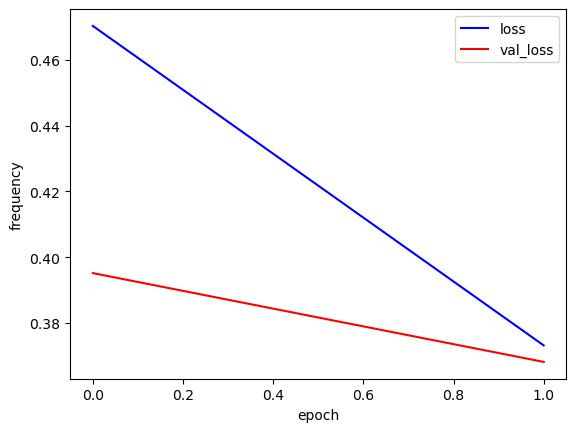

In [13]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

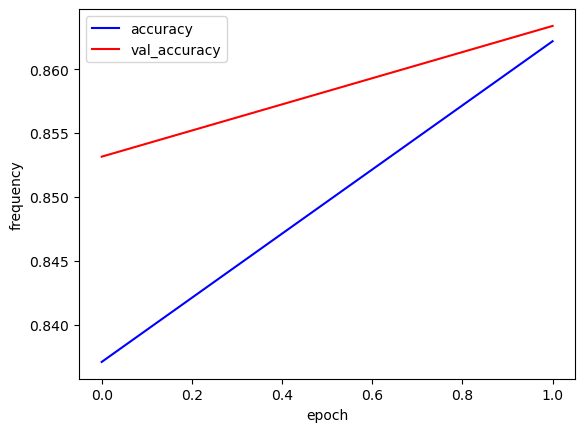

In [14]:
plt.plot(history.history["accuracy"], 'b', label="accuracy")
plt.plot(history.history["val_accuracy"], 'r', label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [15]:
loss, acc = model.evaluate(test_x, test_y)
print(loss, acc)

3636/3636 [==============================] - 15s 4ms/step - loss: 0.3682 - accuracy: 0.8634
0.3681899607181549 0.8633792400360107


In [16]:
predictions = model.predict(test_x)

3636/3636 [==============================] - 15s 4ms/step


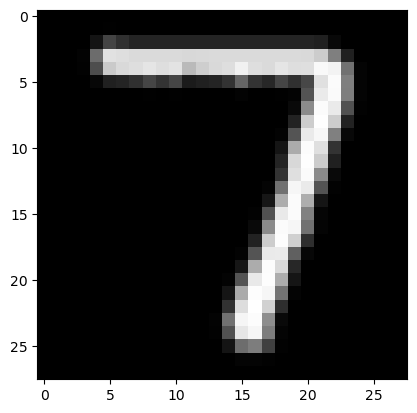

In [26]:
plt.imshow(test_x[1], interpolation="nearest", cmap="gray")

In [18]:
# Get the predicted class label or index
predicted_class_index = np.argmax(predictions[1])

# You can also get the class label if you have a dictionary mapping
class_label = word_dict[predicted_class_index]

# Print or use the results
print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

Predicted Class Index: 7
Predicted Class Label: 7


In [19]:
confusion = confusion_matrix(np.argmax(test_y, axis=1),np.argmax(predictions, axis=1))
print(confusion)

[[5116    1    1 ...    0    0    0]
 [   0 6019    1 ...    0    0    0]
 [   0    2 5674 ...    1    0   85]
 ...
 [   0    0    1 ...  365    2    1]
 [   0    0    0 ...    2  163    0]
 [   0    0   61 ...    5    0  249]]


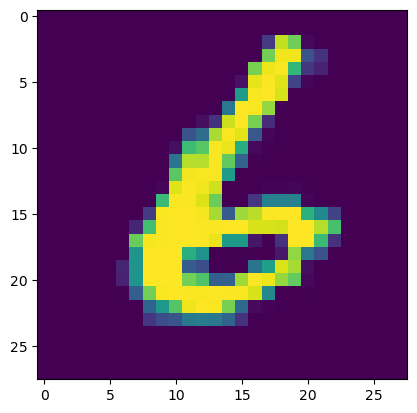

In [20]:
# Load the external image
image_path = 'downloaded6.jpg'  

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

img = cv2.resize(img, (28, 28))

img= 255- img

plt.imshow(img)  # 'cmap' specifies the color map, 'gray' for grayscale
plt.show()

# Reshape the image to match the model's input shape
img = img.reshape(1, 28, 28, 1)

In [21]:
# Make predictions

acc = model.predict(img)

# the predicted class label 
predicted_class_index = np.argmax(acc)

class_label = word_dict[predicted_class_index]

print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

1/1 [==============================] - 0s 30ms/step
Predicted Class Index: 6
Predicted Class Label: 6


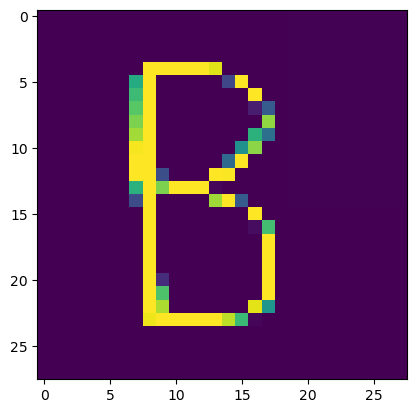

In [22]:
# Load the external image
image_path = 'B.jpg' 

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

img = cv2.resize(img, (28, 28))

img= 255- img

plt.imshow(img)  # 'cmap' specifies the color map, 'gray' for grayscale
plt.show()

# Reshape the image to match the model's input shape
img = img.reshape(1, 28, 28, 1)

In [23]:
# Make predictions
loaded_model = load_model("model.h5")


acc = loaded_model.predict(img)

# Get the predicted class label or index
predicted_class_index = np.argmax(acc)


class_label = word_dict[predicted_class_index]


print("Predicted Class Index:", predicted_class_index)
print("Predicted Class Label:", class_label)

1/1 [==============================] - 0s 28ms/step
Predicted Class Index: 11
Predicted Class Label: B
